# OpenCV 기본 예제

배경 이미지에서 여러개의 목표 이미지를 디텍트하는 예제 실습

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


필요한 모듈 임포트

In [2]:
detectBackgroundImage = cv2.imread('inGameImage.png', 0)

배경 이미지를 흑화시켜서 로드

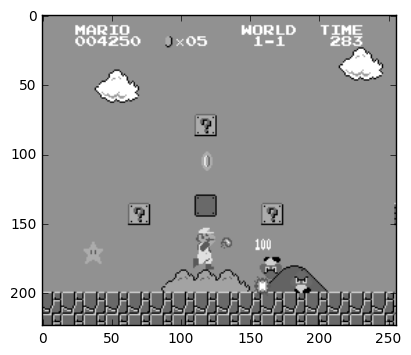

In [3]:
plt.imshow(detectBackgroundImage, cmap="gray")

로드한 배경 이미지를 출력

In [4]:
randomBoxImage = cv2.imread('randomBoxImage.jpg', 0)

목표 이미지를 흑화시켜서 로드

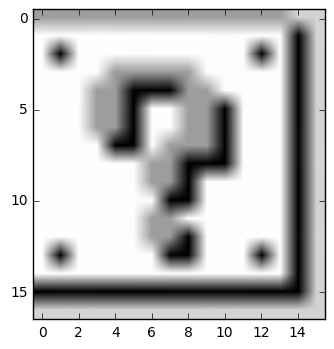

In [5]:
plt.imshow(randomBoxImage, cmap="gray")

로드한 목표 이미지를 출력

In [6]:
randomBoxImageWidth, randomBoxImageHeight = randomBoxImage.shape[:2]
print randomBoxImageWidth, randomBoxImageHeight

17 16


로드한 목표 이미지의 크기 데이터 출력

In [7]:
resultOfDetectedInfo = cv2.matchTemplate(detectBackgroundImage, randomBoxImage, cv2.TM_CCOEFF_NORMED)
print resultOfDetectedInfo

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [-0.08398696  0.09721619 -0.03193511 ...,  0.01836567  0.22994797
  -0.08398696]
 [-0.07083607  0.06628889 -0.03802567 ...,  0.0073593   0.24058881
  -0.07083607]
 [-0.13698104 -0.03172643 -0.07788003 ..., -0.04903148  0.17635225
  -0.13698104]]


배경 이미지에서 목표 이미지를 TM_CCOEFF_NORMED메소드를 이용하여 결과를 출력

In [8]:
thresholdOfDetectedResultScore = 0.8

필터링 할 기준치를 정확도 80%로 설정

In [9]:
detectedLocation = np.where(resultOfDetectedInfo >= thresholdOfDetectedResultScore)
print detectedLocation

(array([ 72, 136, 136]), array([111,  63, 159]))


기준치를 만족하는 결과 데이터를 출력

In [10]:
for eachDetectedLocationData in detectedLocation:
    cv2.rectangle(detectBackgroundImage, (eachDetectedLocationData[0], eachDetectedLocationData[1]), 
                 (eachDetectedLocationData[0] + randomBoxImageHeight, eachDetectedLocationData[1] + randomBoxImageWidth),
                 0, 2)

해당 데이터 수 만큼을 배경 이미지에다가 출력

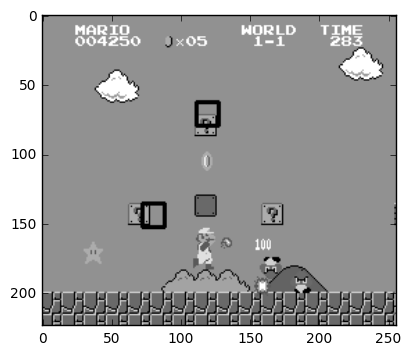

In [11]:
plt.imshow(detectBackgroundImage, cmap="gray")

디텍트된 배경 이미지 출력